In [1]:
import cv2
import pystegano
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Documentation
help(pystegano.lsb)

Help on class lsb in module pystegano.pystegano:

class lsb(builtins.object)
 |  Steganographic tools based on least significant bit (lsb).
 |  
 |  Methods defined here:
 |  
 |  decode(image)
 |      Retrives a secret_message (string) from an image (image) using lsb steganography.
 |  
 |  encode(cover_image, secret_message)
 |      Stores a secret_message (string) into a cover_image (image) using lsb steganography.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [3]:
# Generate Lorem Ipsum text
def random_message():
    response = requests.get("http://loripsum.net/api/10/headers/plaintext")
    if response.status_code == 200:
        secret_msg = response.text
    else:
        # Default secret message, when requests fail
        secret_msg = "Hello There!"
    return secret_msg

In [4]:
# Set directory of cover images
cover_dirname = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset Cover Images"
# Set working directory
dirname = "C:/Users/PC/Masters Files/SteganographyDetection/Datasets/Dataset LSB"

In [5]:
# Add stego payload
for i, filename in enumerate(os.listdir(cover_dirname)):
    cover_image = cv2.imread(cover_dirname + "/" + filename, cv2.IMREAD_UNCHANGED)
    secret_message = random_message()
    encoded_image = pystegano.lsb.encode(cover_image, secret_message)
    cv2.imwrite(dirname + "/LSB" + filename, encoded_image)

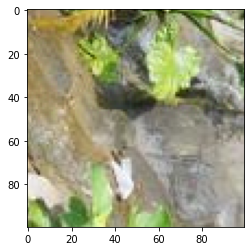

In [6]:
# Display the stego image
test_image = cv2.cvtColor(cv2.imread(dirname + "/LSB59.png"), cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()

In [7]:
# Load stego image
stego_image = cv2.imread(dirname + "/LSB59.png", cv2.IMREAD_UNCHANGED)

In [8]:
# Attempt to decode the secret message
decoded_message = pystegano.lsb.decode(stego_image)

In [9]:
print(decoded_message)

Non quam nostram quidem, inquit Pomponius iocans;

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Cum salvum esse flentes sui respondissent, rogavit essentne fusi hostes. Parvi enim primo ortu sic iacent, tamquam omnino sine animo sint. Duo Reges: constructio interrete. Cum ageremus, inquit, vitae beatum et eundem supremum diem, scribebamus haec. Te ipsum, dignissimum maioribus tuis, voluptasne induxit, ut adolescentulus eriperes P. Fatebuntur Stoici haec omnia dicta esse praeclare, neque eam causam Zenoni desciscendi fuisse. Haec mihi videtur delicatior, ut ita dicam, molliorque ratio, quam virtutis vis gravitasque postulat. 

Primum Theophrasti, Strato, physicum se voluit; Duarum enim vitarum nobis erunt instituta capienda. In quibus doctissimi illi veteres inesse quiddam caeleste et divinum putaverunt. 

An eiusdem modi?

Semper enim ex eo, quod maximas partes continet latissimeque funditur, tota res appellatur. Non est ista, inquam, Piso, magna dissensio. Nulla profecto e